In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import yaml
import numpy as np
from audio_classification.data import BMWDataset
from audio_classification.tools import get_transform

Training on device cuda.


In [9]:
with open("/nfs/homedirs/yuny/project-1/audio_classification/configs/crnn_bmw.yaml", "r") as config_file:
    configs = yaml.load(config_file)
print(configs["DATASET"]["TRANSFORM"]["LENGTH"])

368000


In [43]:
sets = BMWDataset(configs, transform=None)

In [45]:
print("BMW dataset contains {} clips".format(len(sets)))

BMW dataset contains 667 clips


In [44]:
labels = []
lengths = []
for i in range(0, len(sets)):
    sample = sets.__getitem__(i)
    lengths.append(sample['audio'].shape[1])
    labels.append(sample['label'])

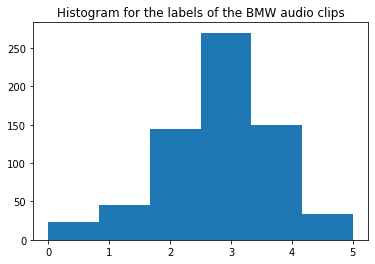

In [50]:
labels = np.array(labels)

plt.title("Histogram for the labels of the BMW audio clips")
plt.hist(labels, bins=6)
plt.show()

BMW audio clips have a median length of 327680.00


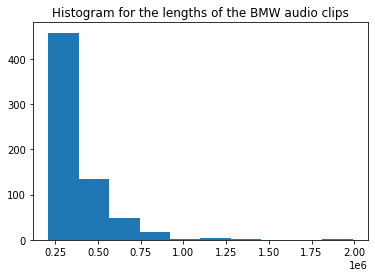

In [55]:
lengths = np.array(lengths)
print("BMW audio clips have a median length of {:.2f}".format(np.median(lengths)))

plt.title("Histogram for the lengths of the BMW audio clips")
plt.hist(lengths)
plt.show()

In [10]:
transform = get_transform(configs)
sets = BMWDataset(configs, transform=transform)

label 5
torch.Size([1, 96, 1438])


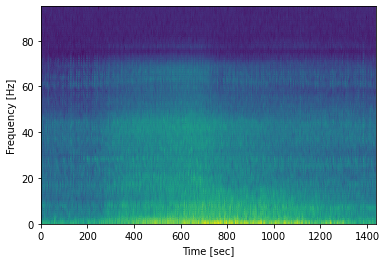

In [11]:
sample = sets.__getitem__(660)
print("label %s" %(sample['label']))
print(sample['audio'].shape)
plt.pcolormesh(sample['audio'].squeeze().numpy(), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()